# Image classification: cats & dogs

In [1]:
# Handle imports up-front
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Import custom helper functions from utils.py
from utils import single_training_run
from utils import plot_single_training_run
from utils import hyperparameter_optimization_run
from utils import plot_hyperparameter_optimization_run

2024-11-28 00:59:25.486101: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Data preparation

### 1.1. Load the data paths

In [2]:
# Set the path to the training data
training_data_path='../data/train'

# Get a list of training dog and cat images
training_dogs=glob.glob(f'{training_data_path}/dog/dog.*')
training_cats=glob.glob(f'{training_data_path}/cat/cat.*')

### 1.2. Inspect

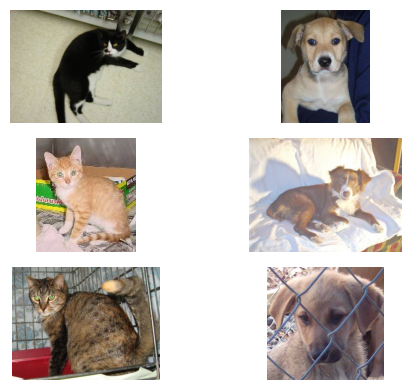

In [3]:
fig, axs = plt.subplots(3,2,figsize=(6, 4))

for cat, dog, row in zip(training_cats, training_dogs, axs):
    for animal, ax in zip([cat, dog], row):
        animal=image.load_img(animal)
        animal=image.img_to_array(animal)
        animal/=255.0
        ax.imshow(animal)
        ax.axis('off')

plt.tight_layout()
plt.show()

## 2. EDA

Let's take a look at a few of our images to get a feel for how image data is structured.

### 2.1. Image data

In [4]:
# Load one of the images as an array and look at it's shape - what do you see, what are the dimensions? Are they what you expect?
# Load one of the dogs
dog=image.load_img(training_dogs[0])

# And convert it to an array - this is how TensorFlow will handel the data
dog=image.img_to_array(dog)

# Take a look at some properties of the object
print(f'Image data is: {type(dog)}')
print(f'Image data shape: {dog.shape}')

Image data is: <class 'numpy.ndarray'>
Image data shape: (500, 390, 3)


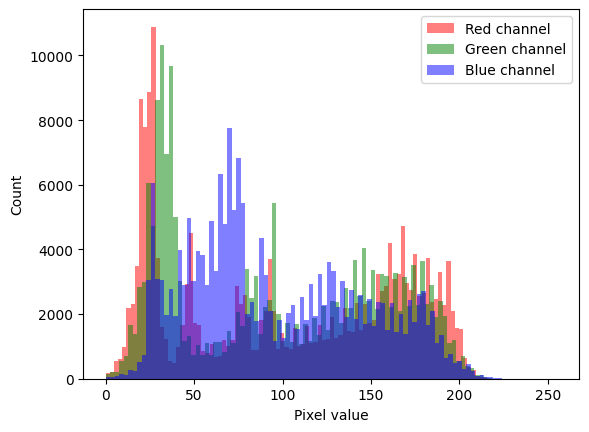

In [5]:
# Plot a histogram of the three 2D arrays which comprise the image. What do you see?
plt.hist(dog[:,:,0].flatten(), bins=100, color='red', alpha=0.5, label='Red channel')
plt.hist(dog[:,:,1].flatten(), bins=100, color='green', alpha=0.5, label='Green channel')
plt.hist(dog[:,:,2].flatten(), bins=100, color='blue', alpha=0.5, label='Blue channel')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()


### 2.2. Image dimensions

Let's take a look at a random sample of images from the dataset and see what their dimensions are.

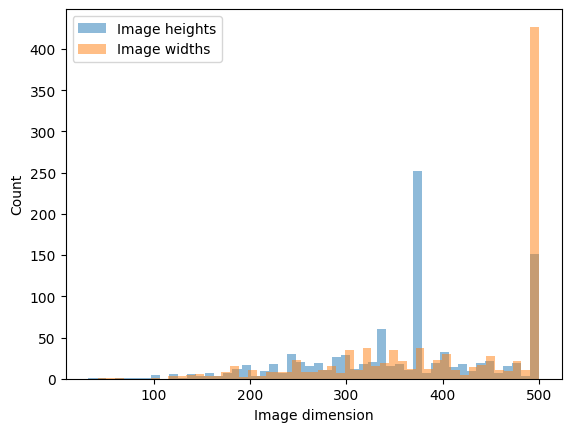

In [6]:
# Loop over a few hundred images and extract their width and heigh, plot both as a histogram. What do you see, does this information matter to us, if so, how?
# Get a random sample of images, half cats and half dogs
sample_size=1000
sample=random.sample(training_dogs, sample_size//2)
sample+=random.sample(training_cats, sample_size//2)

# Collectors for data
heights=[]
widths=[]

# Loop on the sample images
for sample_image in sample:

    # Load the image and convert it to an array
    sample_image=image.load_img(sample_image)
    sample_image=image.img_to_array(sample_image)

    # Get the width and height and add to collections
    heights.append(sample_image.shape[0])
    widths.append(sample_image.shape[1])

# Plot results as a histogram
plt.hist(heights, bins=50, alpha=0.5, label='Image heights')
plt.hist(widths, bins=50, alpha=0.5, label='Image widths')
plt.xlabel('Image dimension')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()

In [7]:
image_width=128

### 2.3. Image aspect ratios

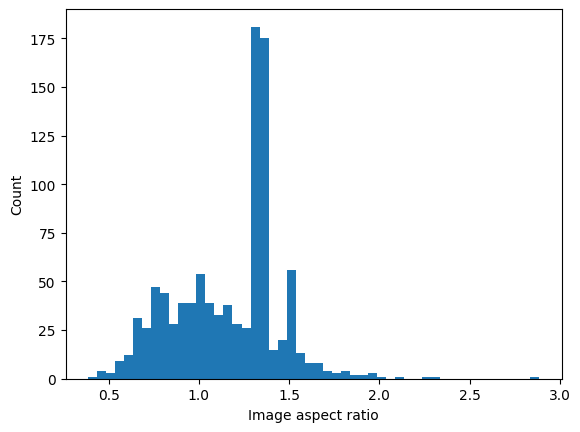

In [8]:
# Plot a histogram of the image aspect ratios (i.e. width/height) What do you see, does this information matter to us, if so, how?
# Calculate the sample image aspect ratios
aspect_ratios=np.array(widths)/np.array(heights)

# Plot as histogram
plt.hist(aspect_ratios, bins=50)
plt.xlabel('Image aspect ratio')
plt.ylabel('Count')
plt.show()

In [9]:
# Set the target aspect ratio. We will use this later to calculate how tall the image should be based on the requested image dim
aspect_ratio=4/3

## 3. Build the model

### 3.1. Baseline Model Training

In [10]:
# Do a single training run with default settings
training_results=single_training_run(training_data_path)

# Collect the results so we can plot all of the experiments together at the end
experiment_results={'Baseline model': training_results}

# Plot the results
plot_single_training_run(training_results).show()

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


2024-11-28 01:01:44.346385: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-28 01:01:45.979801: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23869440 exceeds 10% of free system memory.
2024-11-28 01:01:46.036401: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26879040 exceeds 10% of free system memory.
2024-11-28 01:01:46.119814: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23869440 exceeds 10% of free system memory.
2024-11-28 01:01:46.134385: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26879040 exceeds 10% of free system memory.
2024-11-28 01:01:46.225200: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23869440 exceeds 10% of free system memory.


FileNotFoundError: [Errno 2] No such file or directory: '../data/experiment_results/single_model_run_128_1.3333333333333333_16_0.1_0.0_0.0_100_50_50.plk'

### 3.2. Batch size and learning rate optimization

In [ ]:
# Define hyperparameters
hyperparameters={
    'batch_sizes': [16, 64, 256],
    'learning_rates': [0.01, 0.0001, 0.000001]
}

# Train the model with each set of hyperparameters
hyperparameter_optimization_results=hyperparameter_optimization_run(
    training_data_path,
    **hyperparameters
)

# Specify which hyperparameters to include in the plot labels
plot_labels=['batch_sizes', 'learning_rates']

# Plot the learning curves
plot_hyperparameter_optimization_run(
    hyperparameter_optimization_results,
    hyperparameters,
    plot_labels
).show()

### 3.3. Optimized model

In [ ]:
# Set some hyperparameters for the run
hyperparameters={'batch_size': 256, 'learning_rate': 0.0001}

# Do a single training run
training_results=single_training_run(training_data_path, **hyperparameters)

# Collect the results so we can plot all of the experiments together at the end
experiment_results['Optimized model']=training_results

# Plot the results
plot_single_training_run(training_results).show()

### 3.4. Regularization optimization

In [ ]:
# Define hyperparameters
hyperparameters={
    'batch_sizes': [256],
    'learning_rates': [0.0001],
    'l1_penalties': [0.01, 0.001, 0.0001],
    'l2_penalties': [0.01, 0.001, 0.0001]
}

# Train the model with each combination of hyperparameters
hyperparameter_optimization_results=hyperparameter_optimization_run(
    training_data_path,
    **hyperparameters
)

# Specify which hyperparameters to include in the plot labels
plot_labels=['l1_penalties', 'l2_penalties']

# Plot the training curves
plot_hyperparameter_optimization_run(
    hyperparameter_optimization_results,
    hyperparameters,
    plot_labels
).show()

### 3.5. Optimized & regularized model

In [ ]:
# Set some hyperparameters for the run
hyperparameters={
    'l1_penalty': 0.001,
    'l2_penalty': 0.01,
    'batch_size': 256,
    'learning_rate': 0.0001
}

# Do a single training run
training_results=single_training_run(training_data_path, **hyperparameters)

# Collect the results so we can plot all of the experiments together at the end
experiment_results['Regularized model']=training_results

# Plot the results
plot_single_training_run(training_results).show()

### 3.6. Input image size optimization

In [ ]:
# Define hyperparameters
hyperparameters={
    'batch_sizes': [256],
    'learning_rates': [0.0001],
    'l1_penalties': [0.001],
    'l2_penalties': [0.01],
    'image_widths': [32, 64, 128, 256]
}

# Train the model with each combination of hyperparameters
hyperparameter_optimization_results=hyperparameter_optimization_run(
    training_data_path,
    **hyperparameters
)

# Specify which hyperparameters to include in the plot labels
plot_labels=['image_widths']

# Plot the training curves
plot_hyperparameter_optimization_run(
    hyperparameter_optimization_results,
    hyperparameters,
    plot_labels
).show()

In [ ]:
# Set some hyperparameters for the run
hyperparameters={
    'l1_penalty': 0.001,
    'l2_penalty': 0.01,
    'batch_size': 256,
    'learning_rate': 0.0001,
    'image_width': 256,
    'epochs': 500
}

# Do a single training run
training_results=single_training_run(training_data_path, **hyperparameters)

# Collect the results so we can plot all of the experiments together at the end
experiment_results['Input size optimized model']=training_results

# Plot the results
plot_single_training_run(training_results).show()